In [4]:
!pip install requests

In [6]:
import csv
import requests

In [2]:
with open('data\Brasil_covid_19.csv', 'r') as arquivo_csv:
    leitor = csv.reader(arquivo_csv)
    for linha in leitor:
        print(linha)

['data', 'pais', 'novos_casos', 'novos_obitos', 'total_casos', 'total_obitos']
['2019-12-31', 'Brasil', '0', '0', '0', '0']
['2020-01-01', 'Brasil', '0', '0', '0', '0']
['2020-01-02', 'Brasil', '0', '0', '0', '0']
['2020-01-03', 'Brasil', '0', '0', '0', '0']
['2020-01-04', 'Brasil', '0', '0', '0', '0']
['2020-01-05', 'Brasil', '0', '0', '0', '0']
['2020-01-06', 'Brasil', '0', '0', '0', '0']
['2020-01-07', 'Brasil', '0', '0', '0', '0']
['2020-01-08', 'Brasil', '0', '0', '0', '0']
['2020-01-09', 'Brasil', '0', '0', '0', '0']
['2020-01-10', 'Brasil', '0', '0', '0', '0']
['2020-01-11', 'Brasil', '0', '0', '0', '0']
['2020-01-12', 'Brasil', '0', '0', '0', '0']
['2020-01-13', 'Brasil', '0', '0', '0', '0']
['2020-01-14', 'Brasil', '0', '0', '0', '0']
['2020-01-15', 'Brasil', '0', '0', '0', '0']
['2020-01-16', 'Brasil', '0', '0', '0', '0']
['2020-01-17', 'Brasil', '0', '0', '0', '0']
['2020-01-18', 'Brasil', '0', '0', '0', '0']
['2020-01-19', 'Brasil', '0', '0', '0', '0']
['2020-01-20', 'Brasi

# API

In [11]:
import requests

In [12]:
url = 'https://api.exchangerate-api.com/v6/latest'
req = requests.get(url)
print(req.status_code)

200


In [13]:
dados = req.json()
print(dados)

{'result': 'success', 'provider': 'https://www.exchangerate-api.com', 'documentation': 'https://www.exchangerate-api.com/docs/free', 'WARNING_NEW_ENDPOINT': 'Swap *api.exchangerate-api.com* with *open.er-api.com* for better servers!', 'terms_of_use': 'https://www.exchangerate-api.com/terms', 'time_last_update_unix': 1626480152, 'time_last_update_utc': 'Sat, 17 Jul 2021 00:02:32 +0000', 'time_next_update_unix': 1626567902, 'time_next_update_utc': 'Sun, 18 Jul 2021 00:25:02 +0000', 'time_eol_unix': 0, 'base_code': 'USD', 'rates': {'USD': 1, 'AED': 3.67, 'AFN': 80.18, 'ALL': 103.69, 'AMD': 494.91, 'ANG': 1.79, 'AOA': 647.54, 'ARS': 96.25, 'AUD': 1.35, 'AWG': 1.79, 'AZN': 1.7, 'BAM': 1.65, 'BBD': 2, 'BDT': 84.81, 'BGN': 1.66, 'BHD': 0.376, 'BIF': 1970.43, 'BMD': 1, 'BND': 1.35, 'BOB': 6.89, 'BRL': 5.1, 'BSD': 1, 'BTN': 74.61, 'BWP': 11.01, 'BYN': 2.54, 'BZD': 2, 'CAD': 1.26, 'CDF': 1978.53, 'CHF': 0.919, 'CLP': 752.52, 'CNY': 6.47, 'COP': 3795.72, 'CRC': 619.32, 'CUC': 1, 'CUP': 25.75, 'CV

In [14]:
valor_reais = float(input('Informe o valor em R$ a ser convertido:'))
cotacao = dados['rates']['BRL']
print(f'R$ {valor_reais:.2f} em dólar valem US$ {(valor_reais/cotacao):.2f}')

Informe o valor em R$ a ser convertido:


ValueError: could not convert string to float: ''

# Projeto Final

In [33]:
import requests as r
import datetime as dt
import pandas as pd
import csv

In [34]:
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = r.get(url)

In [35]:
resp.status_code

200

In [36]:
raw_data = resp.json()

In [37]:
raw_data[0]

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [38]:
final_data =[]
for obs in raw_data:
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

In [39]:
final_data.insert(0, ['confirmados', 'obitos', 'recuperados', 'ativos', 'data'])

In [40]:
for i in range(1, len(final_data)):
    final_data[i][4] = final_data[i][4][:10]

In [41]:
for i in range(1, len(final_data)):
    final_data[i][4] = dt.datetime.strptime(final_data[i][4][:10], '%Y-%m-%d')

In [42]:
final_data

[['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 1, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 2, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 3, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 4, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 5, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 6, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 7, 0, 0)],
 [20, 0, 0, 20, datetime.datetime(2020, 3, 8, 0, 0)],
 [25, 0, 0, 25, datetime.datetime(2020, 3, 9, 0, 0)],
 [31, 0, 0, 31, datetime.datetime(2020, 3, 10, 0, 0)],
 [38, 0, 0, 38, datetime.datetime(2020, 3, 11, 0, 0)],
 [52, 0, 0, 52, datetime.datetime(2020, 3, 12, 0, 0)],
 [151, 0, 0, 151, datetime.datetime(2020, 3, 13, 0, 0)],
 [151, 0, 0, 151, datetime.da

In [43]:
with open('brasil-covid.csv', 'w') as file:
    writer=csv.writer(file, lineterminator="\n")
    writer.writerows(final_data)

In [44]:
with open('brasil-covid.csv', 'r') as file:
    read = csv.reader(file)
    for linha in read:
        print(linha)

['confirmados', 'obitos', 'recuperados', 'ativos', 'data']
['1', '0', '0', '1', '2020-02-26 00:00:00']
['1', '0', '0', '1', '2020-02-27 00:00:00']
['1', '0', '0', '1', '2020-02-28 00:00:00']
['2', '0', '0', '2', '2020-02-29 00:00:00']
['2', '0', '0', '2', '2020-03-01 00:00:00']
['2', '0', '0', '2', '2020-03-02 00:00:00']
['2', '0', '0', '2', '2020-03-03 00:00:00']
['4', '0', '0', '4', '2020-03-04 00:00:00']
['4', '0', '0', '4', '2020-03-05 00:00:00']
['13', '0', '0', '13', '2020-03-06 00:00:00']
['13', '0', '0', '13', '2020-03-07 00:00:00']
['20', '0', '0', '20', '2020-03-08 00:00:00']
['25', '0', '0', '25', '2020-03-09 00:00:00']
['31', '0', '0', '31', '2020-03-10 00:00:00']
['38', '0', '0', '38', '2020-03-11 00:00:00']
['52', '0', '0', '52', '2020-03-12 00:00:00']
['151', '0', '0', '151', '2020-03-13 00:00:00']
['151', '0', '0', '151', '2020-03-14 00:00:00']
['162', '0', '0', '162', '2020-03-15 00:00:00']
['200', '0', '1', '199', '2020-03-16 00:00:00']
['321', '1', '2', '318', '2020-

In [45]:
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data':y[i]
            })
        return datasets
    else:
        return [
            {
                'label': labels[0],
                'data': y
            }
        ]

In [46]:
def set_title(title=''):
    if title != '':
        display = 'true'
    else:
        display='false'
    return{
        'title': title,
        'display':display
    }

In [63]:
def create_chart (x, y, labels, kind='bar', title =''):
    
    datasets = get_datasets(y,labels)
    options = set_title(title)
    
    chart ={
        'type': kind,
        'data':{
            'labels': x,
            'datasets':datasets
        },
        'options': options
    }
    
    return chart

In [58]:
def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    resp = r.get(f'{url_base}?c={str(chart)}')
    return resp.content

In [65]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [60]:
from PIL import Image
from IPython.display import display

In [67]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

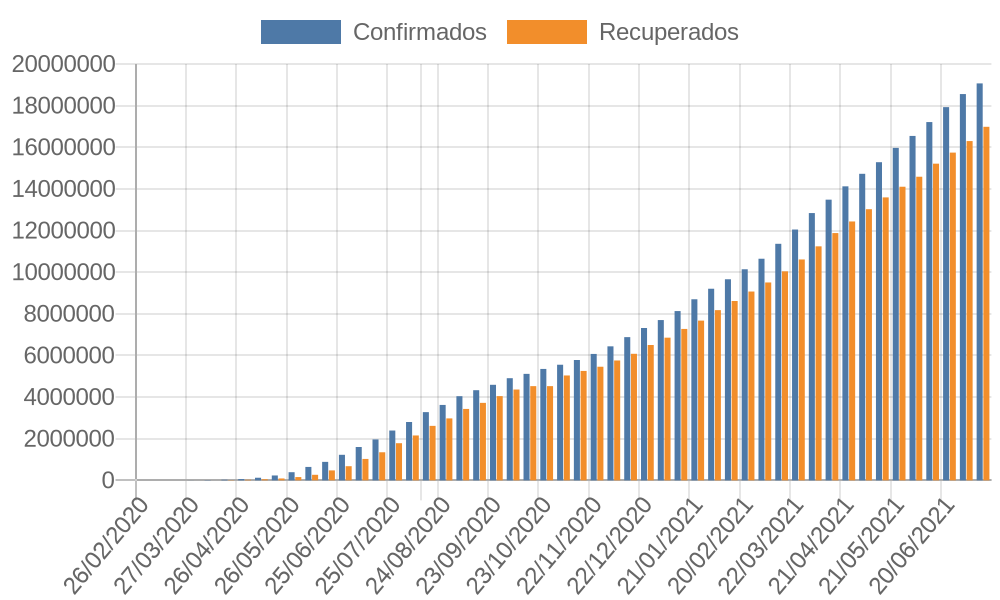

In [115]:
y_data_1 = []
for obs in final_data[1::10]:
    y_data_1.append(obs[0]) #Confirmados
    
y_data_2 = []
for obs in final_data[1::10]:
    y_data_2.append(obs[2]) #Recuperados
    

labels = ['Confirmados', 'Recuperados']

x = []
for obs in final_data[1::10]:
    x.append(obs[4].strftime('%d/%m/%Y')) #Data

chart = create_chart(x, [y_data_1, y_data_2], labels, title = "Confirmado vs Recuperados")
chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico.png', chart_content)
display_image('meu-primeiro-grafico.png')

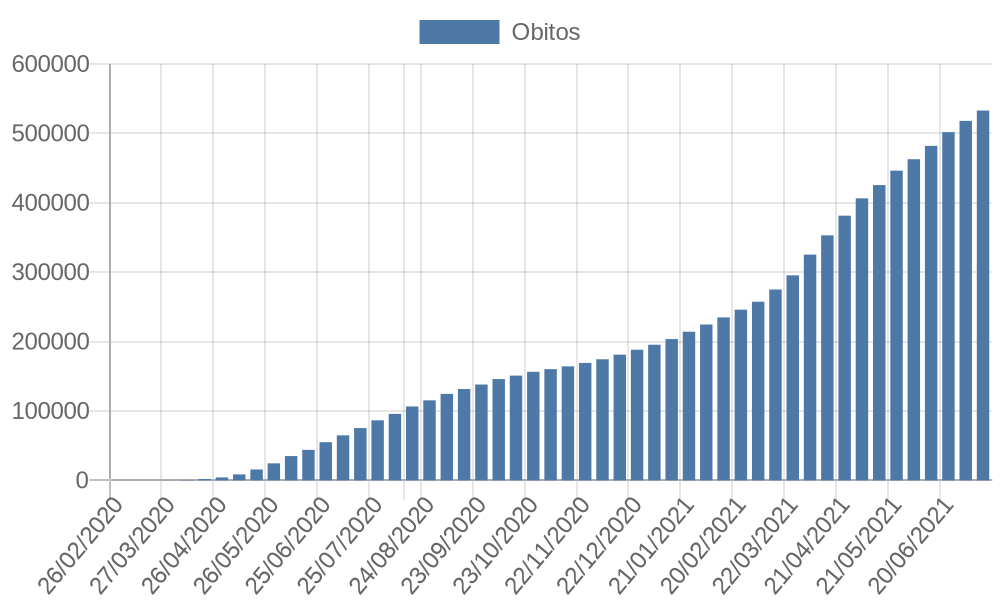

In [124]:
y_data_3 = []
for obs in final_data[1::10]:
    y_data_3.append(obs[1]) #Obitos

labels = ['Obitos']

x = []
for obs in final_data[1::10]:
    x.append(obs[4].strftime('%d/%m/%Y')) #Data

chart1 = create_chart(x,[ y_data_3], labels, title = 'Obitos')
chart_content1 = get_api_chart(chart1)
save_image('meu-segundo-grafico.png', chart_content1)
display_image('meu-segundo-grafico.png')

In [93]:
from urllib.parse import quote

In [103]:
def get_api_qrcode(link):
    text = quote(link) #parsing do link para url
    url_base = 'https://quickchart.io/qr'
    resp = r.get(f'{url_base}?text={text}')
    return resp.content

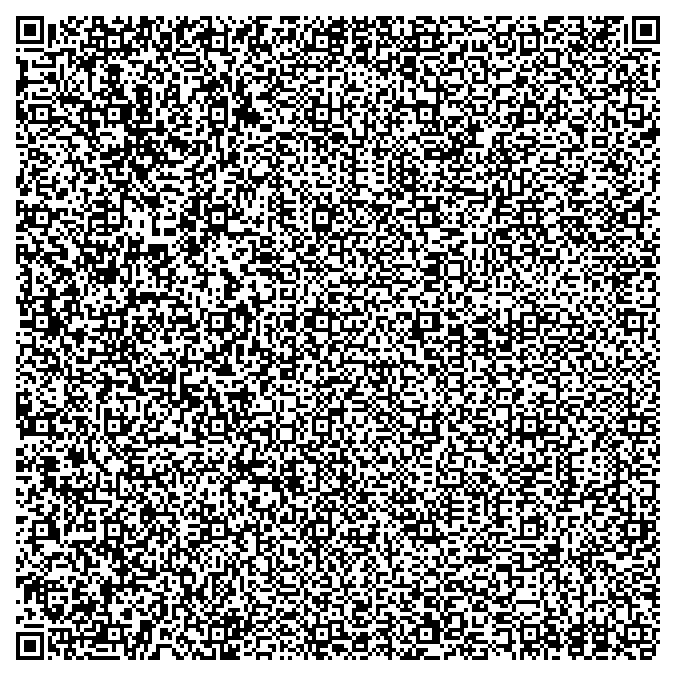

In [117]:
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')

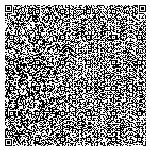

In [125]:
url_base = 'https://quickchart.io/chart'
link_1 = f'{url_base}?c={str(chart1)}'
save_image('qr-code-1.png', get_api_qrcode(link_1))
display_image('qr-code-1.png')